## Introduction
The MNIST dataset is among one of the most famous image classification problems. This dataset is bit more challenging version of the same root problem. This multiclassification problem consists of classifying letters from A to J from images. The dataset is available on **Kaggle** entitled as *notMNIST Example*.
### Problem Context
The notMNIST dataset can be used for multiclass image classification task for classifying letters from A to J. The dataset comes in two versions - notMNIST(small) and notMNIST(large). The smaller dataset consists of around 18726 images with 0.5% label error rate and the larger dataset contains around 529119 images with about 6.5% label error rate. Every image contains 28x28 grayscale pixels.<br>
In this project, we will build a simple **CNN** model on smaller version of dataset using high level API **keras** for **image classification**, bacause the larger version dataset requires a decent hardware configuration.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import time
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input,Dense,Dropout
from keras.layers import Reshape, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

Using TensorFlow backend.


Load Dataset :

In [2]:
images = []
labels = []
file_path = 'C:/Users/g.singh.choudhary/Desktop/Python/Kaggle Workplace/notMNIST_small/notMNIST_small/'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
for classy in classes:
    for path in os.listdir(file_path+classy):
        image_path = os.path.join(file_path, classy, path)
        img = cv2.imread(image_path, 0)
        images.append(cv2.resize(img, (28, 28)))
        labels.append(classy)

Randomly shuffle the data to make our model general and avoid pattern or biasing

In [3]:
dataset = list(zip(images, labels))
np.random.shuffle(dataset)
X, Y = zip(*dataset)
X = np.asarray(X)
Y = np.asarray(Y)

Lets plot few images and get insights to see, what are the different images we are dealing with.

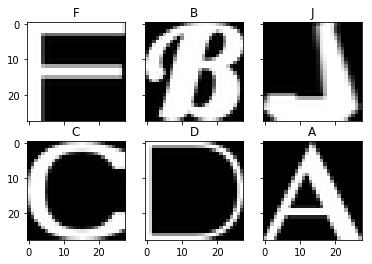

In [4]:
fig, ax = plt.subplots(2, 3, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(6):
    ax[i].imshow(X[i], cmap = 'gray', interpolation = 'nearest')
    ax[i].set_title(Y[i])
plt.show()

In [5]:
X.shape, Y.shape

((18724, 28, 28), (18724,))

In [6]:
X.resize(X.shape[0], 28, 28, 1)
Y.resize(Y.shape[0], 1)

In [7]:
X.shape, Y.shape

((18724, 28, 28, 1), (18724, 1))

So X contains 18726 samples of 28x28 pixel images and Y contains the labels from A to J

In [8]:
lb = LabelBinarizer()
Y = lb.fit_transform(Y)

Splitting our entire dataset into three sets as below:<br>
Training set : 80%<br>
Validation set : 10%<br>
Test Set : 10%<br>

In [9]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 0)

Why? bacause, test set should be completely fresh to the model for testing purpose

We can see the shapes of all data sets.

In [10]:
X_train.shape, Y_train.shape

((14979, 28, 28, 1), (14979, 10))

In [11]:
X_val.shape, Y_val.shape

((1872, 28, 28, 1), (1872, 10))

In [12]:
X_test.shape, Y_test.shape

((1873, 28, 28, 1), (1873, 10))

### Deep Learning CNN Model :

For implementing a CNN, we will stack up Convolutional Layers, followed by Max Pooling layers. We will also include Dropout to avoid overfitting. Finally, we will add a fully connected ( Dense ) layer followed by a softmax layer. 

In [13]:
input_shape = X[0].shape
n_classes  = Y.shape[1]

We'll use three bolcks of conovolution layers followed by flatten and fully connnected layer. In each block of convolution layer, we have two layers of convolutional network, one max pooling layer and one drop out layer with 0.3 probabilty for regularization. After convolution blocks and flatten layer we have one fully conncted neural network with 32 neurons and one drop out layer with 50% regularization. The final layer performs classification using softmax activation among our 10 classes.

In [19]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), padding = 'same', activation ='relu', input_shape = input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32, (3, 3), padding = 'same', activation ='relu', input_shape = input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3), padding = 'same', activation ='relu', input_shape = input_shape))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    return model

Here we can see the summary of propsed model by compiling it and then calling summary method. The summary method displays all the layers, their ouput shapes and no. of parameters to be trained for that layer.

In [20]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [21]:
start = time.time()
cnn = model.fit(X_train, Y_train, epochs = 50, batch_size = 64, validation_data = [X_val, Y_val], verbose = 1)
end = time.time()
print('\n\nTime Taken to train the CNN Model for Classification is : %.2f'%(end-start), ' sec')

Train on 14979 samples, validate on 1872 samples
Epoch 1/50
14979/14979 [==============================] - 55s 4ms/step - loss: 2.4260 - acc: 0.1764 - val_loss: 1.1765 - val_acc: 0.5956
Epoch 2/50
14979/14979 [==============================] - 54s 4ms/step - loss: 1.1939 - acc: 0.5745 - val_loss: 0.6264 - val_acc: 0.7746
Epoch 3/50
14979/14979 [==============================] - 54s 4ms/step - loss: 0.8067 - acc: 0.7248 - val_loss: 0.4225 - val_acc: 0.8739
Epoch 4/50
14979/14979 [==============================] - 54s 4ms/step - loss: 0.5865 - acc: 0.8146 - val_loss: 0.3263 - val_acc: 0.9017
Epoch 5/50
14979/14979 [==============================] - 54s 4ms/step - loss: 0.4900 - acc: 0.8472 - val_loss: 0.3004 - val_acc: 0.9071
Epoch 6/50
14979/14979 [==============================] - 54s 4ms/step - loss: 0.4363 - acc: 0.8665 - val_loss: 0.2866 - val_acc: 0.9199
Epoch 7/50
14979/14979 [==============================] - 54s 4ms/step - loss: 0.3968 - acc: 0.8790 - val_loss: 0.2757 - val_acc:

### Loss :

By plotting the model loss history, we can visualize how our model reduced the loss and then it almost got saturated over the epochs.

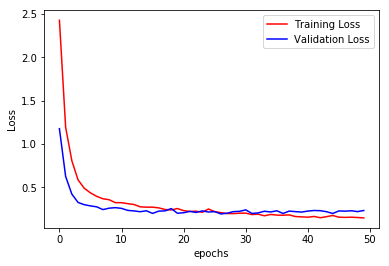

In [22]:
plt.figure()
plt.plot(cnn.history['loss'], 'r')
plt.plot(cnn.history['val_loss'], 'b')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

After 20 epochs, validation loss is almost saturated, whereas training loss is decreasing at very slow rate.

### Accuracy :

By plotting the model accuracy history, we can visualize how our model imporoved the accuracy for training and validation set over epochs.

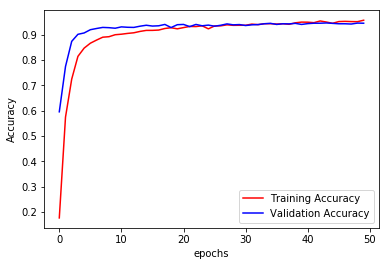

In [23]:
plt.figure()
plt.plot(cnn.history['acc'], 'r')
plt.plot(cnn.history['val_acc'], 'b')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

Here it'sclear that after 20 eopchs, training and validation accuracy both are almost saturated.

## Test Score :

In [24]:
loss, score = model.evaluate(X_test, Y_test, verbose = True)

1873/1873 [==============================] - 2s 1ms/step


In [25]:
print("\nTest set Loss : %f"%loss)
print('\nTest Accuracy : %f'%score)


Test set Loss : 0.244286

Test Accuracy : 0.940203


He we can summarize our achievement after training 50 epochs for this model:<br><br>
**Training Accuracy : 95.73%**<br><br>
**Validation Accuracy 94.56: **<br><br>
**Test Accuracy : 94.02**<br><br>
The score is impressive for seen and unseen data, which confirms that the model is not biased.